In [127]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from helpers import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
users = pd.read_csv("data\RateBeer\\users.csv")
with open("data\RateBeer\\ratings_reviews.pickle", "rb") as file:
    ratings_reviews = pickle.load(file)

In [21]:
ratings_reviews['date'] = ratings_reviews['date'].apply(convert_unix_timestamp)

In [31]:
year_list = [2010, 2011, 2012]
year_filter = ratings_reviews['date'].dt.year.isin(year_list)
ratings_reviews_2010_2012 = ratings_reviews.loc[year_filter]

In [37]:
ratings_reviews_2010_2012.sample(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
5627919,Caledonian Deuchars IPA (Cask),44837,Caledonian (Heineken UK),168,Bitter,3.8,2012-10-09 10:00:00,Splitenz,155015,4,7,4,7,16,3.8,"Ah, my dear gateway IPA. I had this several ti..."
3665044,Ellicottville Pale Ale,122234,Ellicottville Brewing,1952,American Pale Ale,5.5,2011-07-20 10:00:00,crhensel,95371,3,6,3,6,14,3.2,Bottle into pint glass (5/24/10)Poured a clear...


In [38]:
users.sample(2)

,nbr_ratings,user_id,user_name,joined,location
8879,64,159307,Janek_Poducha,1.329822e+09,Poland
38595,48,99084,swong17,1.261480e+09,NaN


In [40]:
ratings_reviews_2010_2012 = pd.merge(ratings_reviews_2010_2012, users[['user_id', 'nbr_ratings', 'location']], on = 'user_id', how = 'inner')

In [94]:
location_counts = ratings_reviews_2010_2012['location'].value_counts()

# Get locations with counts greater than or equal to 5000
valid_locations = location_counts[location_counts >= 5000].index

# Filter the ratings DataFrame based on valid locations
ratings_reviews_2010_2012 = ratings_reviews_2010_2012[ratings_reviews_2010_2012['location'].isin(valid_locations)]

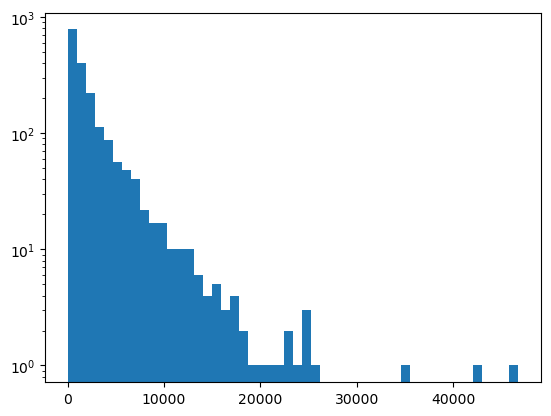

In [95]:
plt.hist(ratings_reviews_2010_2012['nbr_ratings'].unique(), 50)
plt.yscale('log')

In [96]:
ratings_reviews_groupedby_loc_style = ratings_reviews_2010_2012.groupby(['location', 'style'])

In [97]:
location_style = ratings_reviews_groupedby_loc_style.size().reset_index(name = 'number')

In [98]:
ratings_reviews_groupedby_loc = ratings_reviews_2010_2012.groupby('location')
ratings_reviews_loc = ratings_reviews_groupedby_loc.size().reset_index(name = 'total_loc_number')

ratings_reviews_loc['location_mean'] = ratings_reviews_groupedby_loc['rating'].mean().reset_index(name = 'location_mean')['location_mean']
ratings_reviews_loc['location_std'] = ratings_reviews_groupedby_loc['rating'].std().reset_index(name = 'location_std')['location_std']
ratings_reviews_loc

,location,total_loc_number,location_mean,location_std
0,Australia,20732,3.198910,0.718941
1,Belgium,21265,3.323800,0.689351
2,Canada,106594,3.267051,0.689442
3,Denmark,151826,3.059540,0.620647
4,England,78565,3.233748,0.590423
5,Estonia,7090,2.840240,0.719486
6,Finland,43889,3.111488,0.644704
7,Germany,41072,2.947952,0.644384
8,Hungary,5628,3.186798,0.741260
9,Italy,11451,3.405624,0.745202


In [99]:
location_style = pd.merge(location_style, ratings_reviews_loc, on = 'location', how = 'inner')

In [100]:
location_style['popularity_percentage'] = 100* (location_style['number'] / location_style['total_loc_number'])

In [101]:
location_style['mean_rating'] = ratings_reviews_groupedby_loc_style['rating'].mean().reset_index(name = 'mean_rating')['mean_rating']
location_style = location_style[['location', 'style', 'number', 'total_loc_number', 'popularity_percentage', 'mean_rating', 'location_mean', 'location_std']]
location_style

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std
0,Australia,Abbey Dubbel,248,20732,1.196218,3.467742,3.198910,0.718941
1,Australia,Abbey Tripel,334,20732,1.611036,3.510479,3.198910,0.718941
2,Australia,Abt/Quadrupel,151,20732,0.728343,3.906623,3.198910,0.718941
3,Australia,Altbier,78,20732,0.376230,3.247436,3.198910,0.718941
4,Australia,Amber Ale,513,20732,2.474436,3.266667,3.198910,0.718941
...,...,...,...,...,...,...,...,...
3831,"United States, Wisconsin",Traditional Ale,48,17595,0.272805,3.402083,3.408201,0.637304
3832,"United States, Wisconsin",Weizen Bock,118,17595,0.670645,3.600847,3.408201,0.637304
3833,"United States, Wisconsin",Wheat Ale,263,17595,1.494743,2.966160,3.408201,0.637304
3834,"United States, Wisconsin",Witbier,230,17595,1.307190,3.199130,3.408201,0.637304


In [103]:
location_style['z_score'] = (location_style['mean_rating'] - location_style['location_mean']) / location_style['location_std']
location_style

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std,z_score
0,Australia,Abbey Dubbel,248,20732,1.196218,3.467742,3.198910,0.718941,0.373928
1,Australia,Abbey Tripel,334,20732,1.611036,3.510479,3.198910,0.718941,0.433372
2,Australia,Abt/Quadrupel,151,20732,0.728343,3.906623,3.198910,0.718941,0.984382
3,Australia,Altbier,78,20732,0.376230,3.247436,3.198910,0.718941,0.067497
4,Australia,Amber Ale,513,20732,2.474436,3.266667,3.198910,0.718941,0.094245
...,...,...,...,...,...,...,...,...,...
3831,"United States, Wisconsin",Traditional Ale,48,17595,0.272805,3.402083,3.408201,0.637304,-0.009600
3832,"United States, Wisconsin",Weizen Bock,118,17595,0.670645,3.600847,3.408201,0.637304,0.302283
3833,"United States, Wisconsin",Wheat Ale,263,17595,1.494743,2.966160,3.408201,0.637304,-0.693611
3834,"United States, Wisconsin",Witbier,230,17595,1.307190,3.199130,3.408201,0.637304,-0.328055


In [132]:
location_style = location_style[location_style['number'] >= 50]
location_style

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std,z_score
0,Australia,Abbey Dubbel,248,20732,1.196218,3.467742,3.198910,0.718941,0.373928
1,Australia,Abbey Tripel,334,20732,1.611036,3.510479,3.198910,0.718941,0.433372
2,Australia,Abt/Quadrupel,151,20732,0.728343,3.906623,3.198910,0.718941,0.984382
3,Australia,Altbier,78,20732,0.376230,3.247436,3.198910,0.718941,0.067497
4,Australia,Amber Ale,513,20732,2.474436,3.266667,3.198910,0.718941,0.094245
...,...,...,...,...,...,...,...,...,...
3829,"United States, Wisconsin",Stout,406,17595,2.307474,3.538670,3.408201,0.637304,0.204720
3830,"United States, Wisconsin",Sweet Stout,409,17595,2.324524,3.523227,3.408201,0.637304,0.180489
3832,"United States, Wisconsin",Weizen Bock,118,17595,0.670645,3.600847,3.408201,0.637304,0.302283
3833,"United States, Wisconsin",Wheat Ale,263,17595,1.494743,2.966160,3.408201,0.637304,-0.693611


In [138]:
location_style_groupedby_loc = location_style.groupby('location')
idx_most_popular = location_style_groupedby_loc['number'].idxmax()
most_popular_styles_by_location = location_style.loc[idx_most_popular]
most_popular_styles_by_location

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std,z_score
55,Australia,Pale Lager,1537,20732,7.413660,2.012101,3.198910,0.718941,-1.650773
92,Belgium,Belgian Strong Ale,2893,21265,13.604514,3.522710,3.323800,0.689351,0.288547
203,Canada,India Pale Ale (IPA),8139,106594,7.635514,3.464713,3.267051,0.689442,0.286699
285,Denmark,India Pale Ale (IPA),6560,151826,4.320736,3.395503,3.059540,0.620647,0.541311
343,England,Bitter,13120,78565,16.699548,3.040366,3.233748,0.590423,-0.327531
467,Estonia,Pale Lager,973,7090,13.723554,1.990339,2.840240,0.719486,-1.181261
548,Finland,Pale Lager,2236,43889,5.094671,1.915385,3.111488,0.644704,-1.855277
636,Germany,Pilsener,3878,41072,9.441956,2.808020,2.947952,0.644384,-0.217157
713,Hungary,Pale Lager,460,5628,8.173419,1.994783,3.186798,0.741260,-1.608093
750,Italy,Belgian Strong Ale,929,11451,8.112829,3.662217,3.405624,0.745202,0.344328


In [141]:
k = 3
idx_k_most_popular = location_style_groupedby_loc['number'].nlargest(k).index.get_level_values(1)
k_most_popular_styles_by_location = location_style.loc[idx_k_most_popular]
k_most_popular_styles_by_location

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std,z_score
55,Australia,Pale Lager,1537,20732,7.413660,2.012101,3.198910,0.718941,-1.650773
41,Australia,India Pale Ale (IPA),1309,20732,6.313911,3.562185,3.198910,0.718941,0.505292
6,Australia,American Pale Ale,1207,20732,5.821918,3.250207,3.198910,0.718941,0.071351
92,Belgium,Belgian Strong Ale,2893,21265,13.604514,3.522710,3.323800,0.689351,0.288547
91,Belgium,Belgian Ale,2644,21265,12.433576,3.255030,3.323800,0.689351,-0.099760
...,...,...,...,...,...,...,...,...,...
3711,"United States, Washington",Imperial IPA,2213,34964,6.329367,3.668911,3.418582,0.608783,0.411196
3714,"United States, Washington",Imperial Stout,1897,34964,5.425581,3.804955,3.418582,0.608783,0.634665
3796,"United States, Wisconsin",India Pale Ale (IPA),1332,17595,7.570332,3.511261,3.408201,0.637304,0.161712
3795,"United States, Wisconsin",Imperial Stout,1026,17595,5.831202,3.822612,3.408201,0.637304,0.650256


In [139]:
idx_highest_rated = location_style_groupedby_loc['z_score'].idxmax()
highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
highest_rated_styles_by_location

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std,z_score
2,Australia,Abt/Quadrupel,151,20732,0.728343,3.906623,3.198910,0.718941,0.984382
83,Belgium,Abt/Quadrupel,463,21265,2.177287,3.911879,3.323800,0.689351,0.853092
164,Canada,Abt/Quadrupel,995,106594,0.933448,3.875779,3.267051,0.689442,0.882929
284,Denmark,Imperial Stout,6421,151826,4.229183,3.805716,3.059540,0.620647,1.202254
332,England,Abt/Quadrupel,356,78565,0.453128,3.848315,3.233748,0.590423,1.040891
452,Estonia,Imperial Stout,127,7090,1.791255,3.732283,2.840240,0.719486,1.239835
533,Finland,Imperial Stout,1576,43889,3.590877,3.823096,3.111488,0.644704,1.103776
619,Germany,Imperial Stout,592,41072,1.441371,3.771284,2.947952,0.644384,1.277702
699,Hungary,Imperial Stout,125,5628,2.221038,3.984800,3.186798,0.741260,1.076548
741,Italy,Abt/Quadrupel,133,11451,1.161471,4.187218,3.405624,0.745202,1.048836


In [140]:
k = 3
idx_k_highest_rated = location_style_groupedby_loc['z_score'].nlargest(k).index.get_level_values(1)
k_highest_rated_styles_by_location = location_style.loc[idx_k_highest_rated]
k_highest_rated_styles_by_location

,location,style,number,total_loc_number,popularity_percentage,mean_rating,location_mean,location_std,z_score
2,Australia,Abt/Quadrupel,151,20732,0.728343,3.906623,3.198910,0.718941,0.984382
40,Australia,Imperial Stout,735,20732,3.545244,3.825986,3.198910,0.718941,0.872223
37,Australia,Imperial IPA,552,20732,2.662551,3.761957,3.198910,0.718941,0.783161
83,Belgium,Abt/Quadrupel,463,21265,2.177287,3.911879,3.323800,0.689351,0.853092
121,Belgium,Imperial Stout,986,21265,4.636727,3.873631,3.323800,0.689351,0.797607
...,...,...,...,...,...,...,...,...,...
3714,"United States, Washington",Imperial Stout,1897,34964,5.425581,3.804955,3.418582,0.608783,0.634665
3744,"United States, Washington",Sour Red/Brown,417,34964,1.192655,3.756355,3.418582,0.608783,0.554833
3802,"United States, Wisconsin",Lambic Style - Gueuze,76,17595,0.431941,4.035526,3.408201,0.637304,0.984341
3825,"United States, Wisconsin",Sour Red/Brown,162,17595,0.920716,3.872840,3.408201,0.637304,0.729068
